In [1]:
from skimage import data, io, draw
import skimage as ski
from skimage import feature
import cv2 as cv
import numpy as np
import os


In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
%matplotlib inline

In [4]:
def loadImgColor(path):
    img = cv.imread(path, cv.IMREAD_COLOR)
    return img

In [5]:
def loadImgGrey(path):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return img

In [6]:
def showImage(img):
    io.imshow(img)

In [7]:
def getFilesInDir(path):
    return [f for f in listdir(path) if isfile(join(path, f))]

In [8]:
currPath = os.getcwd()

In [9]:
pathHealthy = currPath + "\healthy"
pathManual = currPath + "\healthy_manualsegm"
pathMask = currPath + "\healthy_fovmask"

In [10]:
healthyImages = getFilesInDir(pathHealthy)
healthyManual = getFilesInDir(pathManual)
healthyMask = getFilesInDir(pathMask)

In [11]:
healthyImages

['01_h.jpg',
 '02_h.jpg',
 '03_h.jpg',
 '04_h.jpg',
 '05_h.jpg',
 '06_h.jpg',
 '07_h.jpg',
 '08_h.jpg',
 '09_h.jpg',
 '10_h.jpg',
 '11_h.jpg',
 '12_h.jpg',
 '13_h.jpg',
 '14_h.jpg',
 '15_h.jpg']

In [12]:
healthyImages = [healthyImages[0], healthyImages[1]]

In [13]:
healthyImages

['01_h.jpg', '02_h.jpg']

In [14]:
manualImages = []
for image in healthyManual:
    manualImages.append(loadImgColor(pathManual + "\\" + image))


In [15]:
maskImages = []
for image in healthyMask:
    maskImages.append(loadImgGrey(pathMask + "\\" + image))


In [16]:
images = []
for image in healthyImages:
    print(image)
    images.append(loadImgColor(pathHealthy + "\\" + image))




01_h.jpg
02_h.jpg


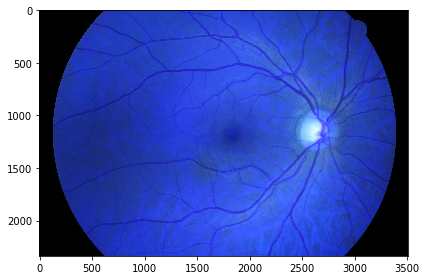

In [17]:
showImage(images[0])

In [18]:
images = list(map(lambda image:cv.cvtColor(image, cv.COLOR_BGR2RGB),images))


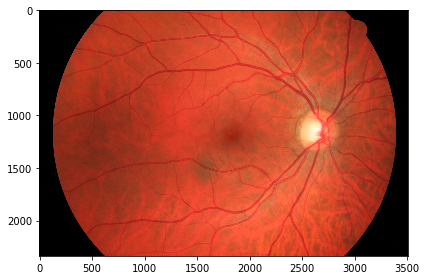

In [19]:
showImage(images[0])
    

In [20]:
def getGreenChannel(image):
    image[:, :, 0] = 0
    image[:, :, 2] = 0
    return image

In [21]:
#Get green channel
images = list(map(lambda image:getGreenChannel(image),images))

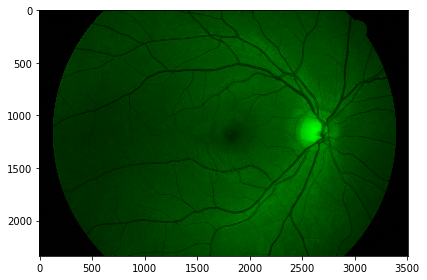

In [22]:
showImage(images[0])

In [23]:
#Convert to grey
images = list(map(lambda image:cv.cvtColor(image, cv.COLOR_BGR2GRAY),images))

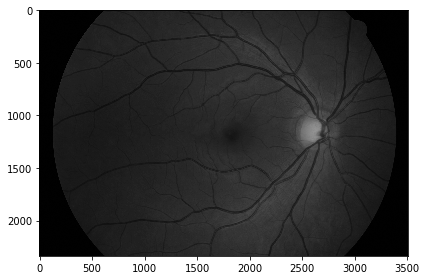

In [24]:
showImage(images[0])

In [25]:
from pylab import *

from skimage import img_as_float, img_as_ubyte

from matplotlib import pylab as plt
import numpy as np

In [26]:
def increaseContrast(image):
    image = img_as_float(image)
    MIN = 10 / 256
    MAX = 70 / 256

    norm = (image - MIN) / (MAX - MIN)
    norm[norm > 1] = 1
    norm[norm < 0] = 0
    
    return img_as_ubyte(norm)

In [27]:
#increase contrast
images = list(map(lambda image:increaseContrast(image),images))

d:\programy\pytyhon\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


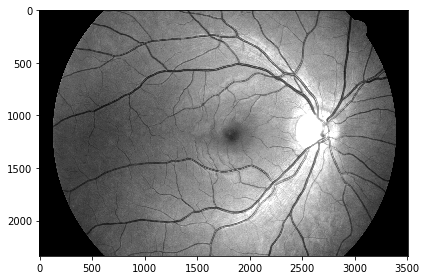

In [28]:
showImage(images[0])

In [29]:
#addaptive treshold
images = list(map(lambda image:cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,25,8),images))

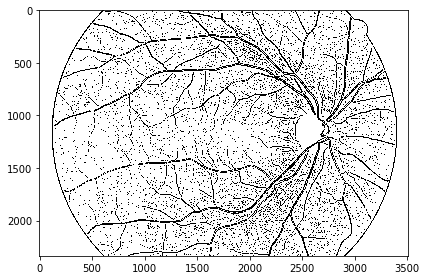

In [30]:
showImage(images[0])

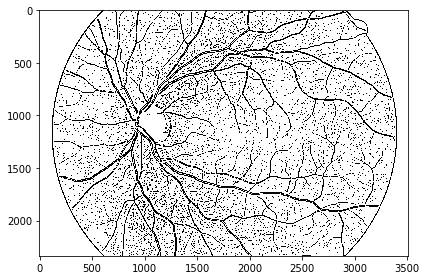

In [31]:
showImage(images[1])

In [32]:
kernel = np.ones((5,5), np.uint8) 

In [33]:
def clearVessels(image):
    img_dilation = cv.dilate(image, kernel, iterations=1) 
    img_erosion = cv.erode(img_dilation, kernel, iterations=2) 
    
    return img_erosion

In [34]:
#erosion and dilatation
images = list(map(lambda image:clearVessels(image),images))

In [35]:
type(images[0])

numpy.ndarray

In [36]:
type(maskImages[0])

numpy.ndarray

In [50]:
images = np.invert(images)

In [51]:
images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

d:\programy\pytyhon\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


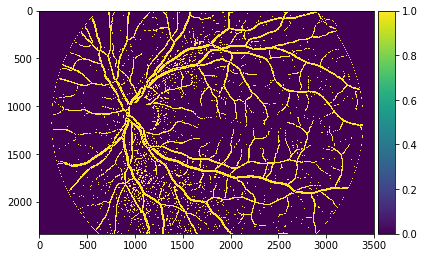

In [54]:
showImage(images[1])

In [44]:
maskImages = [maskImages[0], maskImages[1]]

In [57]:
maskImages[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
for im, mask in zip(images, maskImages):
    for line, lineMask in zip(im, mask):
        for pixel, pixelMask in zip(line, lineMask):
            if pixelMask == 0:
                pixel = 255
            

In [60]:
#images = np.multiply(images,maskImages)

In [1]:
#Check compatibility with manual:
TP = []
TN = []
FP = []
FN = []
for im, man in zip(images, manualImages):
    tpScore = 0
    tnScore = 0
    fpScore = 0
    fnScore = 0
    for line, lineMan in zip(im, man):
        for pixel, pixelMan in zip(line, lineMan):
            if pixelMask == 255 and pixel == 255:
                tpScore+= 1
            if pixelMask == 0 and pixel == 0:
                tnScore+= 1
            if pixelMask == 0 and pixel == 255:
                fpScore+= 1
            if pixelMask == 255 and pixel == 0:
                fnScore+= 1
    #TP.append((tpScore / (im.shape[0] * im.shape[1])) * 100)
    TP.append(tpScore)
    TN.append(tnScore)
    FP.append(fpScore)
    FN.append(fnScore)

NameError: name 'images' is not defined

In [8]:
Sensitivity =  (tpScore/(tpScore + fnScore) for tpScore, fnScore in zip(TP, FN)) 

In [10]:
Specificity =  (tnScore/(tnScore + fpScore) for tnScore, fpScore in zip(TN, FP)) 

In [11]:
Accuracy =  ((tnScore + tpScore)/(tnScore + tpScore + fnScore + fpScore) for tnScore, tpScore, fnScore, fpScore in zip(TN, TP, FN, FP)) 


In [ ]:
#trzeba policzyć sporo rzeczy i zastosować maskędo obrazów oryginalnych

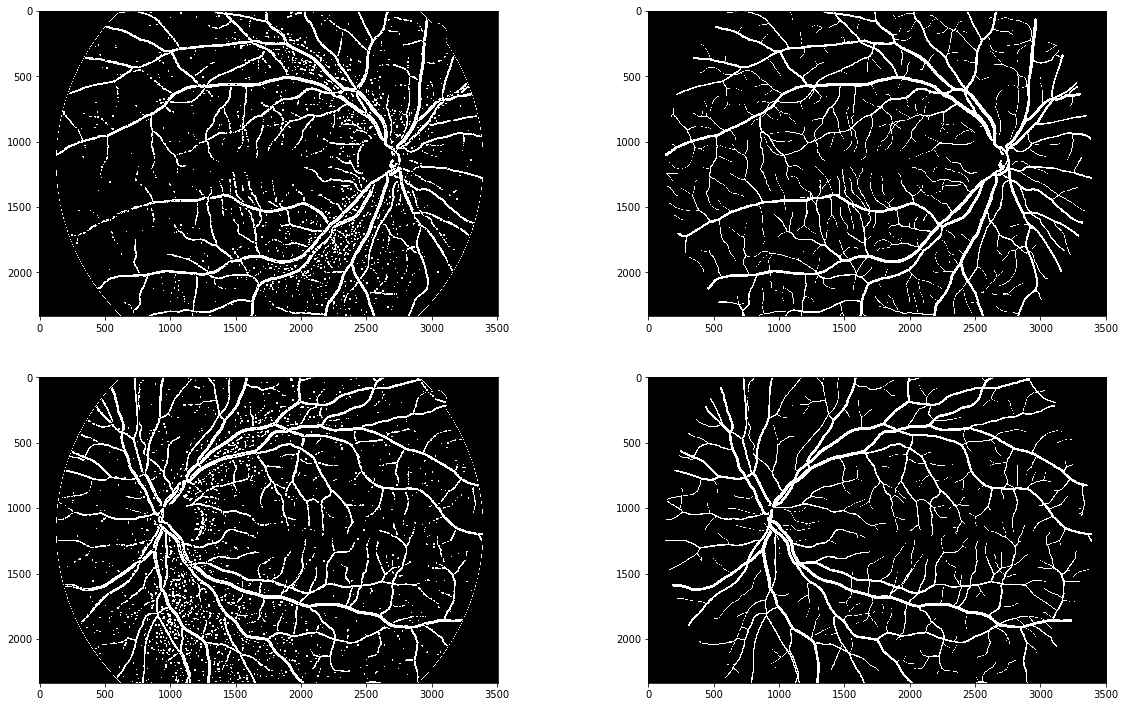

In [66]:
%matplotlib inline
figure(figsize=(20,100))


x = 0
for found, manual in zip(images, manualImages):

    subplot(len(manualImages), 2, 1 + (x * 2)); 
    plt.imshow(found, cmap='gray')
    
#    subplot(4 * len(originalImages), 3, 2 + (x * 3)); 
#    plt.imshow(original)
    
    subplot(len(manualImages), 2, 2 + (x * 2)); 
    plt.imshow(manual)
    
    x += 1